#  Data Visualization Project

Step-1: importing the libraries

In [2]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pyl
import seaborn as sns
import sklearn as sk
import math

# Step-2 Loading the Datasets

In [3]:
Daily_cust = pd.read_csv('OutletDailyCustomers.csv') # daily customers data with date as rows
Outlet_marketing = pd.read_csv('OutletMarketing.csv') # cost spent for Marketing the outlet
Outlet_overheads = pd.read_csv('OutletOverheads.csv') # cost spents for maintenance of outlet
Outlet_size = pd.read_csv('OutletSize.csv') # size of the outlet in metre squared
Outlet_staff = pd.read_csv('OutletStaff.csv') # number of staffs in an outlet

# describing the datasets

In [4]:
dataset_list = [Daily_cust , Outlet_marketing , Outlet_overheads , Outlet_size , Outlet_staff]

for dataset in dataset_list:

    print("shape of the dataset" , dataset.shape)
    print("The first three rows of the dataset \n",dataset.head(3))
    print("basic informaton about the dataset \n" , dataset.info() , "\n" , dataset.describe())

shape of the dataset (365, 46)
The first three rows of the dataset 
          Date  ZSJ  CYK  IZX  NLT  DZZ  DHJ  IFI  YMQ  PLB  ...  HTF  FZI  \
0  01/01/2021    0  837  100   67   56   91   69    0   85  ...   78   69   
1  02/01/2021    0  756   87   47   84  100   83    0   89  ...  101   83   
2  03/01/2021    0  688   85   68   73   90  100    0   78  ...   81   76   

   BMF  AGN  END  HNV  OZW  ZYT  MTE  EEC  
0  814    0   71   54   92   67   49  848  
1  972    0   80   61   92   73   63  877  
2  706    0   92   53  108   75   60  796  

[3 rows x 46 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 46 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   ZSJ     365 non-null    int64 
 2   CYK     365 non-null    int64 
 3   IZX     365 non-null    int64 
 4   NLT     365 non-null    int64 
 5   DZZ     365 non-null    int64 
 6   DHJ     365 non-null    i

# Step-3 Combining the datasets into two Datasets


In [23]:
# Outlet Summary dataset
Outlet_summary = pd.merge(Outlet_staff , pd.merge(Outlet_size , pd.merge(Outlet_marketing , Outlet_overheads , on = 'Id') , on = 'Id') , on = 'Id')

# Step-4 Exploratory Data Analysis

In [6]:
# basic Statistical Explorations

Outlet_mark_sum = Outlet_marketing['Marketing (£)'].sum()
Outlet_overheads_sum = Outlet_overheads['Overheads (£)'].sum()
print(Outlet_summary.head(3))

print("the Total money spent on the marketing by all the outlets is {0} Euros".format(Outlet_mark_sum))
print("the Total money spent on the other maintenances by all the outlets is {0} Euros".format(Outlet_overheads_sum))

print("average money spent on the marketing: ",math.ceil(Outlet_mark_sum / 45) , " Euros")
print("average money spent on the maintenances: ",math.ceil(Outlet_overheads_sum / 45)," Euros")

    Id  Staff  Size (msq)  Marketing (£)  Overheads (£)
0  ZSJ      2          99           1000          87000
1  CYK     18        2297          30000          60000
2  IZX      1          65           2000          24000
the Total money spent on the marketing by all the outlets is 484000 Euros
the Total money spent on the other maintenances by all the outlets is 2494000 Euros
average money spent on the marketing:  10756  Euros
average money spent on the maintenances:  55423  Euros


# Graphical Visualizations

# Visualization -1 representing the frequencies of the outlet parameters

In [7]:
labels = np.array(Outlet_summary.iloc[:,0]).reshape(1,-1)
staff = np.array(Outlet_summary.iloc[:,1]).reshape(1,-1)
size = np.array(Outlet_summary.iloc[:,2]).reshape(1,-1)
marketing = np.array(Outlet_summary.iloc[:,3]).reshape(1,-1)
overheads = np.array(Outlet_summary.iloc[:,4]).reshape(1,-1)

In [8]:
# converting all the values of the dataframe into percentages
values = [staff , size , marketing , overheads]
total_list = []
for value in values:
    total_list.append(value.sum())

staffs_percentage = []
for n in staff:
    for m in n:
        staffs_percentage.append((m/total_list[0])*100)

size_percentages = []
for p in size:
    for q in p:
        size_percentages.append((q/total_list[1])*100)

marketing_percentages = []
for r in marketing:
    for s in r:
        marketing_percentages.append((s/total_list[2])*100)

overheads_percentages = []
for t in overheads:
    for u in t:
        overheads_percentages.append((u/total_list[3])*100)

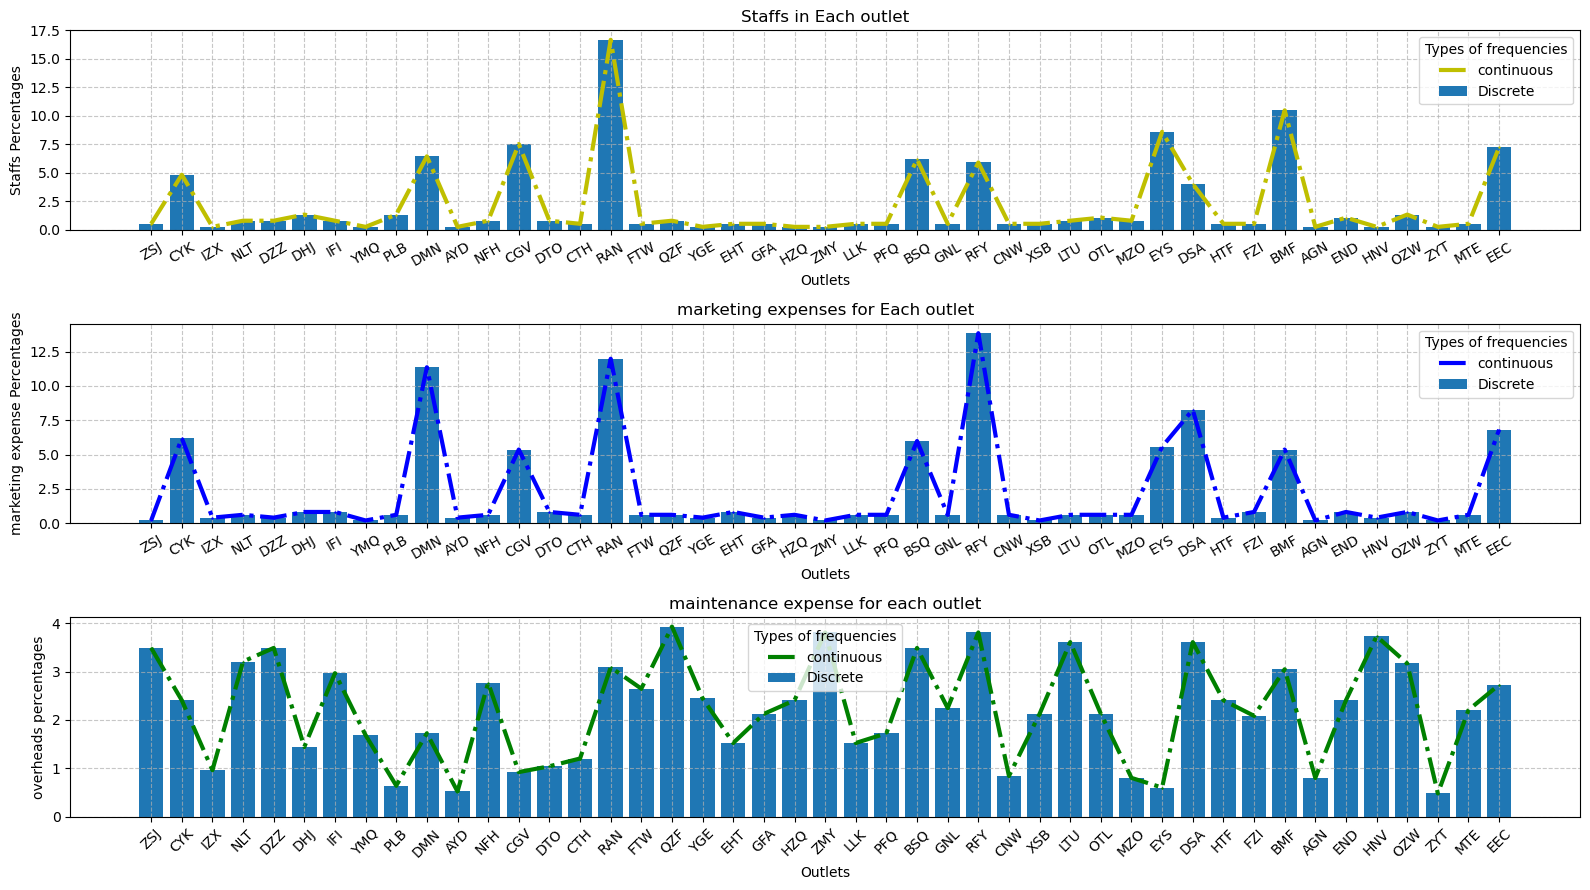

In [9]:
plt.figure(figsize = (16,9))
x = np.linspace(0,44,45)
plt.subplot(3,1,1)
plt.plot(x , staffs_percentage , color = 'y',marker = '+' , markersize = 2 , linestyle = '-.', linewidth = 3)
plt.bar(x , staffs_percentage)
plt.ylabel('Staffs Percentages')
plt.xlabel('Outlets')
plt.title('Staffs in Each outlet')
plt.xticks(x ,labels[0] , rotation = 30)
plt.legend(['continuous' , 'Discrete'] , title = "Types of frequencies" , loc = 'best')
plt.grid(True , linestyle = '--' , alpha = 0.7)

plt.subplot(3,1,2)
plt.plot(x , marketing_percentages , color = 'b',marker = '+' , markersize = 2 , linestyle = '-.', linewidth = 3)
plt.bar(x , marketing_percentages)
plt.ylabel('marketing expense Percentages')
plt.xlabel('Outlets')
plt.title('marketing expenses for Each outlet')
plt.xticks(x ,labels[0] , rotation = 30)
plt.legend(['continuous' , 'Discrete'] , title = "Types of frequencies" , loc = 'best')
plt.grid(True , linestyle = '--' , alpha = 0.7)

plt.subplot(3,1,3)
plt.plot(x , overheads_percentages , color = 'g',marker = '+' , markersize = 2 , linestyle = '-.', linewidth = 3)
plt.bar(x , overheads_percentages)
plt.ylabel('overheads percentages')
plt.xlabel('Outlets')
plt.title('maintenance expense for each outlet')
plt.xticks(x ,labels[0] , rotation = 45)
plt.legend(['continuous' , 'Discrete'] , title = "Types of frequencies")
plt.grid(True , linestyle = '--' , alpha = 0.7)

plt.tight_layout()
plt.show()

# Visualization-2 representing the season in which there are more customers in each outlet

In [10]:
# loading the daily customers dataset and with respect to the month
modified_dataset = pd.read_csv('OutletDailyCustomers.csv', parse_dates=[0])
modified_dataset['Date'] = pd.to_datetime(modified_dataset['Date'], format="%d/%m/%Y")
modified_dataset.set_index('Date', inplace=True)
month_info = modified_dataset.resample('M').sum()

var_creator_list = list(month_info.index.strftime('%d-%m-%Y'))

C:\Users\USER\AppData\Local\Temp\ipykernel_1112\830927688.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  modified_dataset = pd.read_csv('OutletDailyCustomers.csv', parse_dates=[0])


# creating variables

In [11]:
zsj = np.array(month_info['ZSJ']).reshape(1,-1)[0]
cyk = np.array(month_info['CYK']).reshape(1,-1)[0]
izx = np.array(month_info['IZX']).reshape(1,-1)[0]
nlt = np.array(month_info['NLT']).reshape(1,-1)[0]
dzz = np.array(month_info['DZZ']).reshape(1,-1)[0]
dhj = np.array(month_info['DZZ']).reshape(1,-1)[0]
ifi = np.array(month_info['IFI']).reshape(1,-1)[0]
ymq = np.array(month_info['YMQ']).reshape(1,-1)[0]
plb = np.array(month_info['PLB']).reshape(1,-1)[0]
dmn = np.array(month_info['DMN']).reshape(1,-1)[0]
ayd = np.array(month_info['AYD']).reshape(1,-1)[0]
nfh = np.array(month_info['NFH']).reshape(1,-1)[0]
cgv = np.array(month_info['CGV']).reshape(1,-1)[0]
dto = np.array(month_info['DTO']).reshape(1,-1)[0]
cth = np.array(month_info['CTH']).reshape(1,-1)[0]
ran = np.array(month_info['RAN']).reshape(1,-1)[0]
ftw = np.array(month_info['FTW']).reshape(1,-1)[0]
qzf = np.array(month_info['QZF']).reshape(1,-1)[0]
yge = np.array(month_info['YGE']).reshape(1,-1)[0]
eht = np.array(month_info['EHT']).reshape(1,-1)[0]
gfa = np.array(month_info['GFA']).reshape(1,-1)[0]
hzq = np.array(month_info['HZQ']).reshape(1,-1)[0]
zmy = np.array(month_info['ZMY']).reshape(1,-1)[0]
llk = np.array(month_info['LLK']).reshape(1,-1)[0]
pfq = np.array(month_info['PFQ']).reshape(1,-1)[0]
bsq = np.array(month_info['BSQ']).reshape(1,-1)[0]
gnl = np.array(month_info['RFY']).reshape(1,-1)[0]
cnw = np.array(month_info['CNW']).reshape(1,-1)[0]
xsb = np.array(month_info['XSB']).reshape(1,-1)[0]
ltu = np.array(month_info['LTU']).reshape(1,-1)[0]
otl = np.array(month_info['OTL']).reshape(1,-1)[0]
mzo = np.array(month_info['MZO']).reshape(1,-1)[0]
eys = np.array(month_info['EYS']).reshape(1,-1)[0]
dsa = np.array(month_info['DSA']).reshape(1,-1)[0]
htf = np.array(month_info['HTF']).reshape(1,-1)[0]
fzi = np.array(month_info['FZI']).reshape(1,-1)[0]
bmf = np.array(month_info['BMF']).reshape(1,-1)[0]
agn = np.array(month_info['AGN']).reshape(1,-1)[0]
end = np.array(month_info['END']).reshape(1,-1)[0]
hnv = np.array(month_info['HNV']).reshape(1,-1)[0]
ozw = np.array(month_info['OZW']).reshape(1,-1)[0]
zyt = np.array(month_info['ZYT']).reshape(1,-1)[0]
mte = np.array(month_info['MTE']).reshape(1,-1)[0]
eec = np.array(month_info['EEC']).reshape(1,-1)[0]

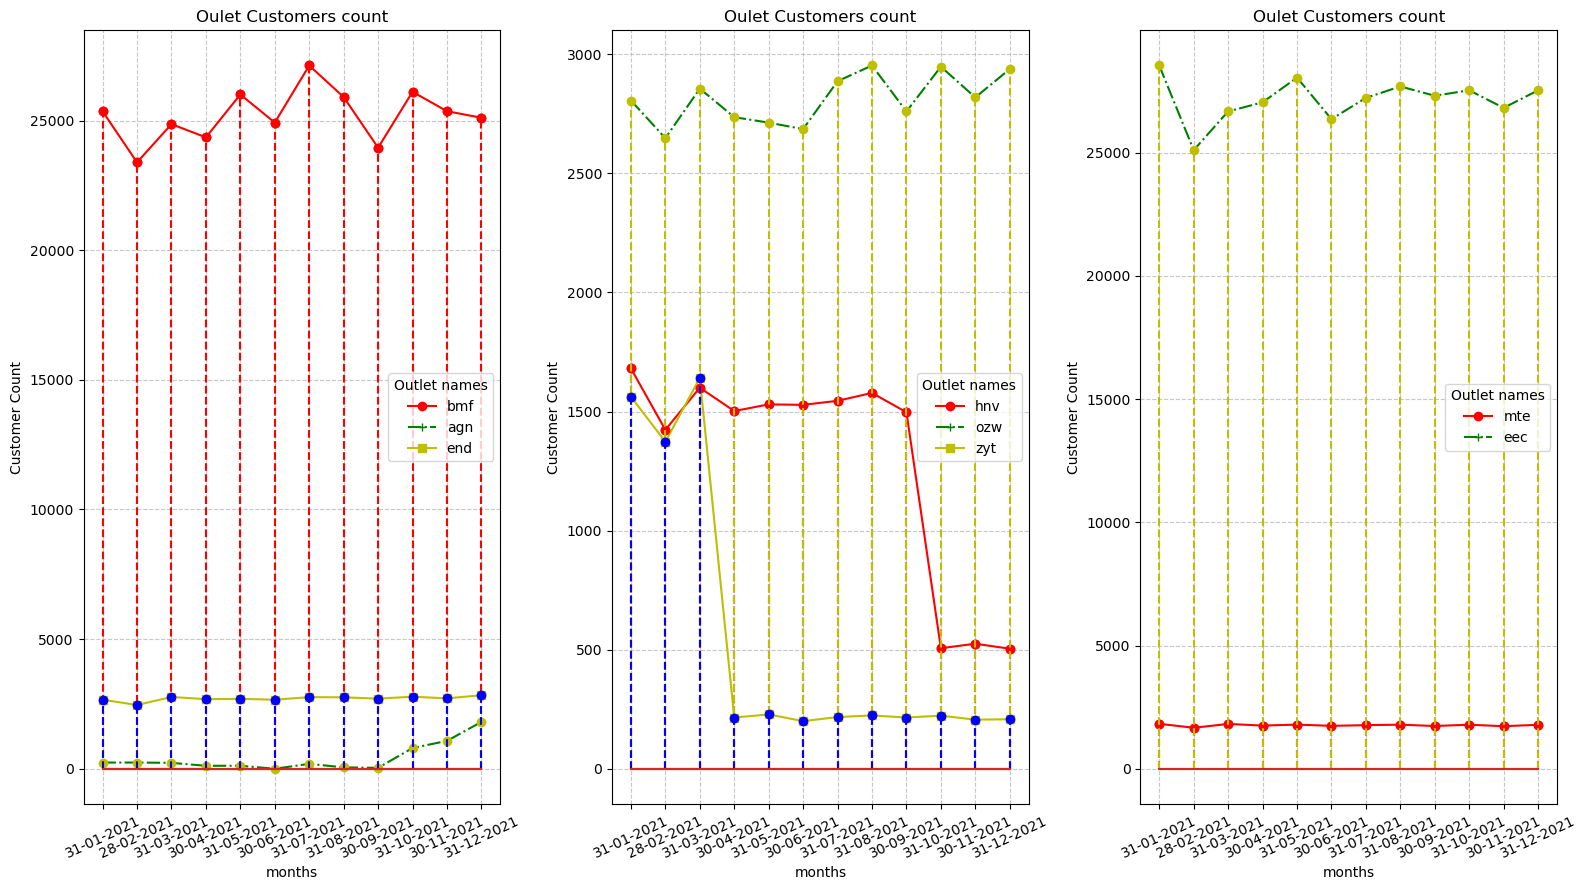

In [12]:
num_months = np.linspace(0,11,12)
plt.figure(figsize = (16,9))
plt.subplot(1,3,1)
plt.plot(num_months , bmf ,'ro-', num_months , agn ,'g+-.', num_months , end ,'ys-' )
plt.stem(num_months , bmf,linefmt = 'r--' , markerfmt = 'ro')
plt.stem(num_months , agn,linefmt = 'y--' , markerfmt = 'yo')
plt.stem(num_months , end,linefmt = 'b--' , markerfmt = 'bo')
plt.legend(["bmf" , "agn" , "end"],title = "Outlet names")
plt.xticks(list(num_months) , var_creator_list,rotation = 25)
plt.xlabel('months')
plt.ylabel('Customer Count')
plt.title("Oulet Customers count")
plt.grid(True , linestyle = '--' , alpha = 0.7)

plt.subplot(1,3,2)
plt.plot(num_months , hnv ,'ro-', num_months , ozw ,'g+-.', num_months , zyt ,'ys-' )
plt.stem(num_months , hnv,linefmt = 'r--' , markerfmt = 'ro')
plt.stem(num_months , ozw,linefmt = 'y--' , markerfmt = 'yo')
plt.stem(num_months , zyt,linefmt = 'b--' , markerfmt = 'bo')
plt.legend(["hnv" , "ozw" , "zyt"],title = "Outlet names")
plt.xticks(list(num_months) , var_creator_list,rotation = 25)
plt.xlabel('months')
plt.ylabel('Customer Count')
plt.title("Oulet Customers count")
plt.grid(True , linestyle = '--' , alpha = 0.7)

plt.subplot(1,3,3)
plt.plot(num_months , mte ,'ro-', num_months , eec ,'g+-.')
plt.stem(num_months , mte,linefmt = 'r--' , markerfmt = 'ro')
plt.stem(num_months , eec,linefmt = 'y--' , markerfmt = 'yo')
plt.legend(["mte" , "eec"],title = "Outlet names")
plt.xticks(list(num_months) , var_creator_list,rotation = 25)
plt.xlabel('months')
plt.ylabel('Customer Count')
plt.title("Oulet Customers count")
plt.grid(True , linestyle = '--' , alpha = 0.7)

plt.tight_layout()
plt.show()

# Visualization-3 Other OUtlets with Hybrid Plots

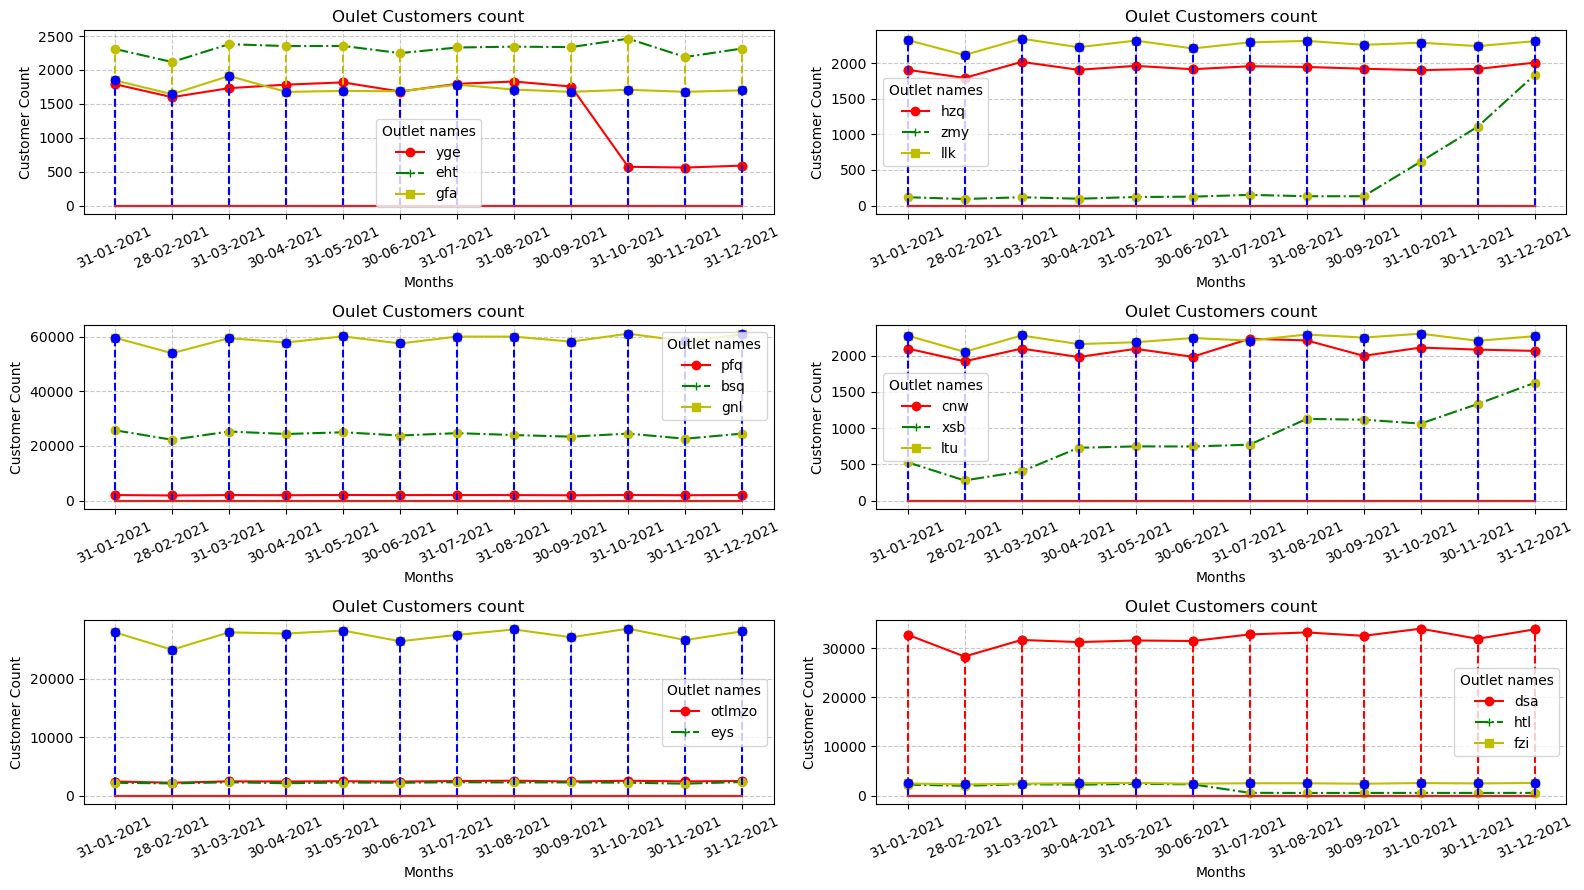

In [13]:

plt.figure(figsize = (16,9))
plt.subplot(3,2,1)
plt.plot(num_months , yge ,'ro-', num_months , eht,'g+-.', num_months , gfa ,'ys-' )
plt.stem(num_months , yge,linefmt = 'r--' , markerfmt = 'ro')
plt.stem(num_months , eht,linefmt = 'y--' , markerfmt = 'yo')
plt.stem(num_months , gfa,linefmt = 'b--' , markerfmt = 'bo')
plt.legend(["yge" , "eht" , "gfa"],title = "Outlet names")
plt.xticks(list(num_months) , var_creator_list,rotation = 25)
plt.xlabel('Months')
plt.ylabel('Customer Count')
plt.title("Oulet Customers count")
plt.grid(True , linestyle = '--' , alpha = 0.7)

plt.subplot(3,2,2)
plt.plot(num_months , hzq ,'ro-', num_months , zmy ,'g+-.', num_months , llk ,'ys-' )
plt.stem(num_months , hzq,linefmt = 'r--' , markerfmt = 'ro')
plt.stem(num_months , zmy,linefmt = 'y--' , markerfmt = 'yo')
plt.stem(num_months , llk,linefmt = 'b--' , markerfmt = 'bo')
plt.legend(["hzq" , "zmy" , "llk"],title = "Outlet names")
plt.xticks(list(num_months) , var_creator_list,rotation = 25)
plt.xlabel('Months')
plt.ylabel('Customer Count')
plt.title("Oulet Customers count")
plt.grid(True , linestyle = '--' , alpha = 0.7)

plt.subplot(3,2,3)
plt.plot(num_months , pfq ,'ro-', num_months , bsq ,'g+-.', num_months , gnl ,'ys-' )
plt.stem(num_months , pfq,linefmt = 'r--' , markerfmt = 'ro')
plt.stem(num_months , bsq,linefmt = 'y--' , markerfmt = 'yo')
plt.stem(num_months , gnl,linefmt = 'b--' , markerfmt = 'bo')
plt.legend(["pfq" , "bsq" , "gnl"],title = "Outlet names")
plt.xticks(list(num_months) , var_creator_list,rotation = 25)
plt.xlabel('Months')
plt.ylabel('Customer Count')
plt.title("Oulet Customers count")
plt.grid(True , linestyle = '--' , alpha = 0.7)

plt.subplot(3,2,4)
plt.plot(num_months , cnw ,'ro-', num_months , xsb ,'g+-.', num_months , ltu ,'ys-' )
plt.stem(num_months , cnw,linefmt = 'r--' , markerfmt = 'ro')
plt.stem(num_months , xsb,linefmt = 'y--' , markerfmt = 'yo')
plt.stem(num_months , ltu,linefmt = 'b--' , markerfmt = 'bo')
plt.legend(["cnw" , "xsb" , "ltu"],title = "Outlet names")
plt.xticks(list(num_months) , var_creator_list,rotation = 25)
plt.xlabel('Months')
plt.ylabel('Customer Count')
plt.title("Oulet Customers count")
plt.grid(True , linestyle = '--' , alpha = 0.7)

plt.subplot(3,2,5)
plt.plot(num_months , otl ,'ro-', num_months , mzo ,'g+-.', num_months , eys ,'ys-' )
plt.stem(num_months , otl,linefmt = 'r--' , markerfmt = 'ro')
plt.stem(num_months , mzo,linefmt = 'y--' , markerfmt = 'yo')
plt.stem(num_months , eys,linefmt = 'b--' , markerfmt = 'bo')
plt.legend(["otl"  "mzo" , "eys"],title = "Outlet names")
plt.xticks(list(num_months) , var_creator_list,rotation = 25)
plt.xlabel('Months')
plt.ylabel('Customer Count')
plt.title("Oulet Customers count")
plt.grid(True , linestyle = '--' , alpha = 0.7)

plt.subplot(3,2,6)
plt.plot(num_months , dsa ,'ro-', num_months , htf ,'g+-.', num_months , fzi ,'ys-' )
plt.stem(num_months , dsa,linefmt = 'r--' , markerfmt = 'ro')
plt.stem(num_months , htf,linefmt = 'y--' , markerfmt = 'yo')
plt.stem(num_months , fzi,linefmt = 'b--' , markerfmt = 'bo')
plt.legend(["dsa" , "htl" , "fzi"],title = "Outlet names")
plt.xticks(list(num_months) , var_creator_list,rotation = 25)
plt.xlabel('Months')
plt.ylabel('Customer Count')
plt.title("Oulet Customers count")
plt.grid(True , linestyle = '--' , alpha = 0.7)

plt.tight_layout()
plt.show()

# Visualization -5 For remaining oulets to specify outlet opening and closing in between the year

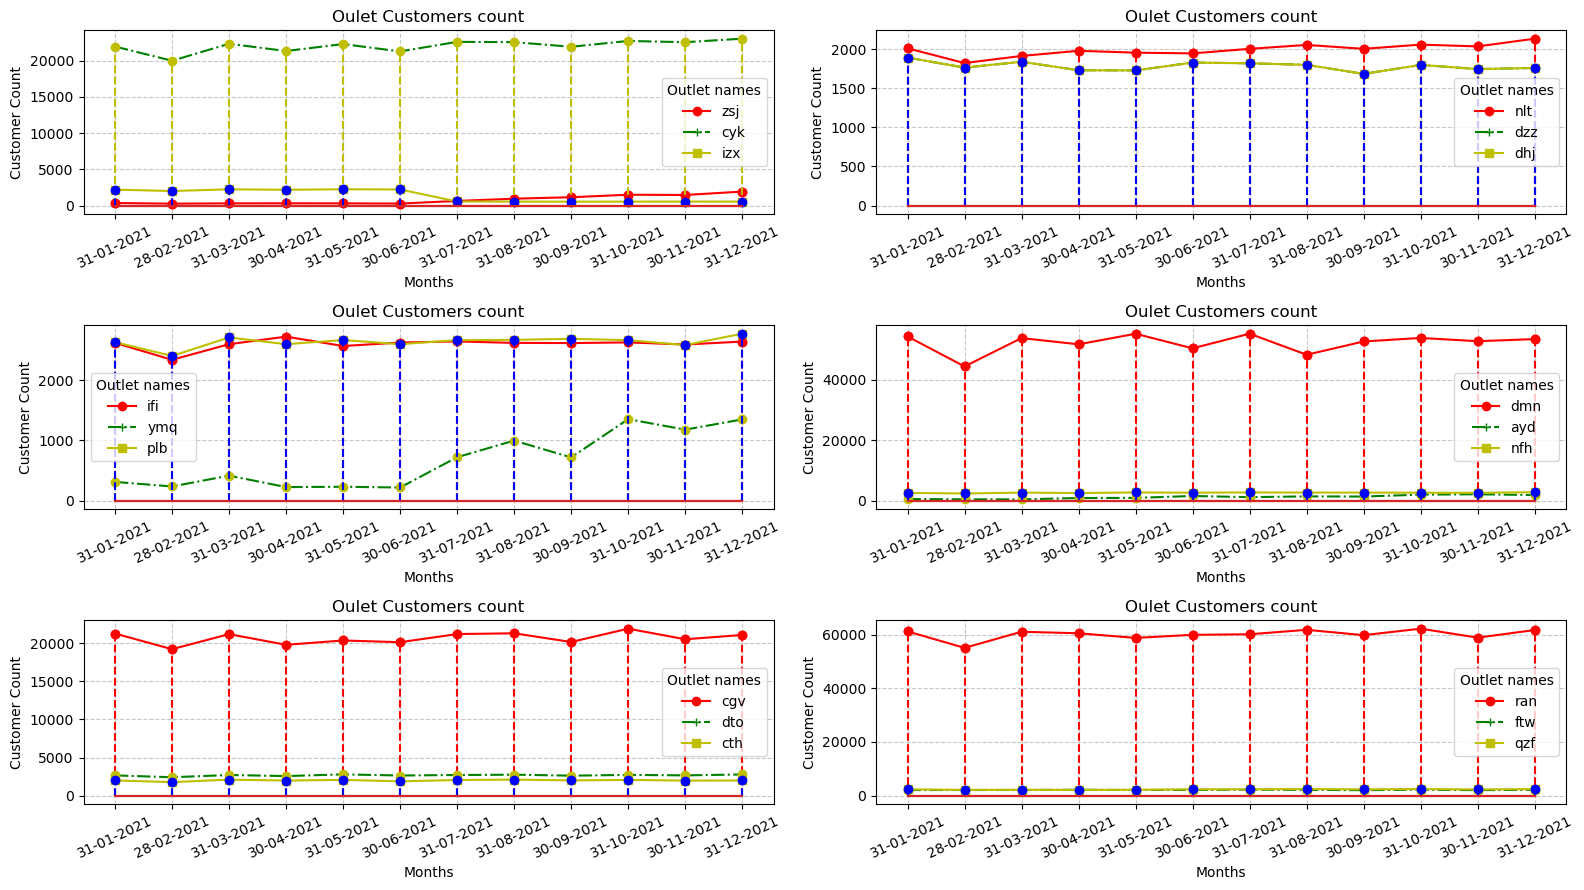

In [14]:
plt.figure(figsize = (16,9))
plt.subplot(3,2,1)
plt.plot(num_months , zsj ,'ro-', num_months , cyk ,'g+-.', num_months , izx ,'ys-' )
plt.stem(num_months , zsj,linefmt = 'r--' , markerfmt = 'ro')
plt.stem(num_months , cyk,linefmt = 'y--' , markerfmt = 'yo')
plt.stem(num_months , izx,linefmt = 'b--' , markerfmt = 'bo')
plt.legend(['zsj' , 'cyk' ,'izx'],title = "Outlet names")
plt.xticks(list(num_months) , var_creator_list,rotation = 25)
plt.xlabel('Months')
plt.ylabel('Customer Count')
plt.title("Oulet Customers count")
plt.grid(True , linestyle = '--' , alpha = 0.7)

plt.subplot(3,2,2)
plt.plot(num_months , nlt ,'ro-', num_months , dzz ,'g+-.', num_months , dhj  ,'ys-' )
plt.stem(num_months , nlt,linefmt = 'r--' , markerfmt = 'ro')
plt.stem(num_months , dzz,linefmt = 'y--' , markerfmt = 'yo')
plt.stem(num_months , dhj,linefmt = 'b--' , markerfmt = 'bo')
plt.legend(['nlt' , 'dzz' ,'dhj'],title = "Outlet names")
plt.xticks(list(num_months) , var_creator_list,rotation = 25)
plt.xlabel('Months')
plt.ylabel('Customer Count')
plt.title("Oulet Customers count")
plt.grid(True , linestyle = '--' , alpha = 0.7)

plt.subplot(3,2,3)
plt.plot(num_months , ifi ,'ro-', num_months , ymq ,'g+-.', num_months , plb ,'ys-' )
plt.stem(num_months , ifi,linefmt = 'r--' , markerfmt = 'ro')
plt.stem(num_months , ymq,linefmt = 'y--' , markerfmt = 'yo')
plt.stem(num_months , plb,linefmt = 'b--' , markerfmt = 'bo')
plt.legend(['ifi' , 'ymq' ,'plb'],title = "Outlet names")
plt.xticks(list(num_months) , var_creator_list,rotation = 25)
plt.xlabel('Months')
plt.ylabel('Customer Count')
plt.title("Oulet Customers count")
plt.grid(True , linestyle = '--' , alpha = 0.7)

plt.subplot(3,2,4)
plt.plot(num_months , dmn ,'ro-', num_months , ayd ,'g+-.', num_months , nfh ,'ys-' )
plt.stem(num_months , dmn,linefmt = 'r--' , markerfmt = 'ro')
plt.stem(num_months , ayd,linefmt = 'y--' , markerfmt = 'yo')
plt.stem(num_months , nfh,linefmt = 'b--' , markerfmt = 'bo')
plt.legend(['dmn' , 'ayd' ,'nfh'],title = "Outlet names")
plt.xticks(list(num_months) , var_creator_list,rotation = 25)
plt.xlabel('Months')
plt.ylabel('Customer Count')
plt.title("Oulet Customers count")
plt.grid(True , linestyle = '--' , alpha = 0.7)

plt.subplot(3,2,5)
plt.plot(num_months , cgv ,'ro-', num_months , dto ,'g+-.', num_months , cth ,'ys-' )
plt.stem(num_months , cgv , linefmt = 'r--' , markerfmt = 'ro')
plt.stem(num_months , dto , linefmt = 'y--' , markerfmt = 'yo')
plt.stem(num_months , cth , linefmt = 'b--' , markerfmt = 'bo')
plt.legend(['cgv' , 'dto' ,'cth'],title = "Outlet names")
plt.xticks(list(num_months) , var_creator_list,rotation = 25)
plt.xlabel('Months')
plt.ylabel('Customer Count')
plt.title("Oulet Customers count")
plt.grid(True , linestyle = '--' , alpha = 0.7)

plt.subplot(3,2,6)
plt.plot(num_months , ran ,'ro-', num_months , ftw ,'g+-.', num_months , qzf ,'ys-' )
plt.stem(num_months , ran,linefmt = 'r--' , markerfmt = 'ro')
plt.stem(num_months , ftw,linefmt = 'y--' , markerfmt = 'yo')
plt.stem(num_months , qzf,linefmt = 'b--' , markerfmt = 'bo')
plt.legend(['ran' , 'ftw' ,'qzf'],title = "Outlet names")
plt.xticks(list(num_months) , var_creator_list,rotation = 25)
plt.xlabel('Months')
plt.ylabel('Customer Count')
plt.title("Oulet Customers count")
plt.grid(True , linestyle = '--' , alpha = 0.7)

plt.tight_layout()
plt.show()

# Visualization-6 Scatter Plots For Relation with winter(dec , jan , feb) , spring(mar , apr , may) , summer(jun , jul  aug) , autumn(sep , oct . nov)


In [15]:
# categorizing the datasets according to the seasons of UK
spring_season_hold = month_info.iloc[2:5,:]
summer_season_hold = month_info.iloc[5:8,:]
autumn_season_hold = month_info.iloc[8:11,:]
winter_season_hold = month_info.iloc[0:2,:]
winter_season_hold = pd.DataFrame(winter_season_hold)
new_row = pd.Series(month_info.iloc[11,:] , index = winter_season_hold.columns)
winter_season_hold.loc[len(winter_season_hold)] = new_row
winter_season_hold.index = ['2021-01-31','2021-02-28','2021-12-31']

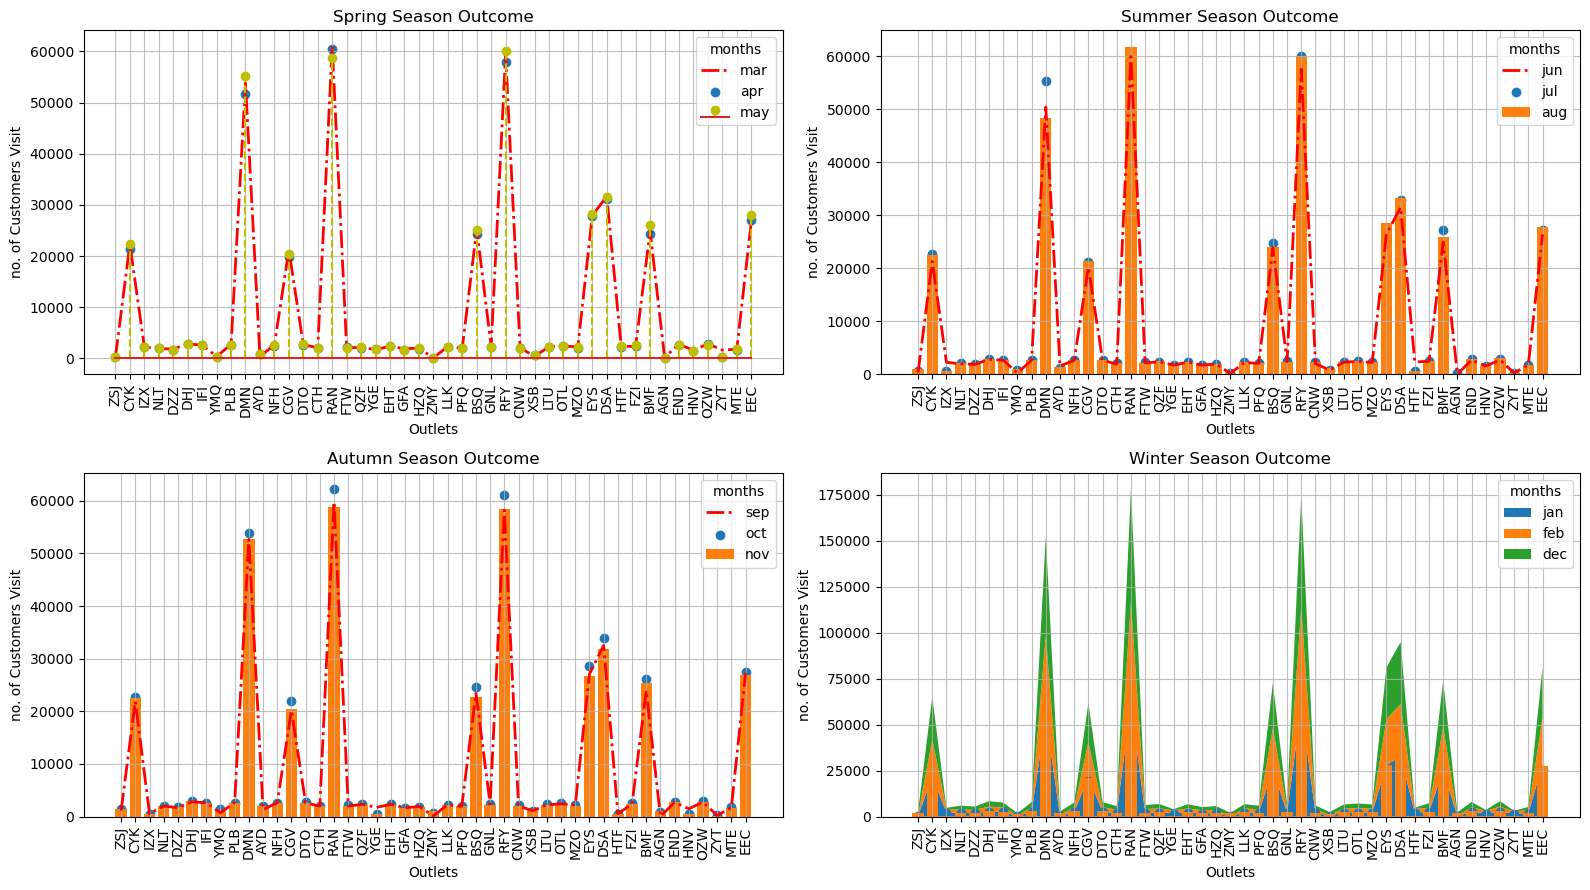

In [16]:
# making a scatterplot
outl = np.linspace(0,44,45)

plt.figure(figsize = (16,9))
plt.subplot(2,2,1)
plt.plot(outl , np.array(pd.DataFrame(spring_season_hold.iloc[0,:])) , color ='r' , linestyle = '-.' , lw = 2)
plt.scatter(outl , np.array(pd.DataFrame(spring_season_hold.iloc[1,:])))
plt.stem(outl , np.array(pd.DataFrame(spring_season_hold.iloc[2,:])), linefmt = 'y--' ,markerfmt = None)
plt.xlabel('Outlets')
plt.ylabel('no. of Customers Visit')
plt.title('Spring Season Outcome')
plt.legend(['mar','apr','may'] , title = "months")
plt.xticks(outl ,labels[0],rotation = 90)
plt.grid(True , alpha = 0.8)

plt.subplot(2,2,2)
plt.plot(outl , summer_season_hold.iloc[0,:] , color ='r' , linestyle = '-.' , lw = 2)
plt.scatter(outl , summer_season_hold.iloc[1,:])
plt.bar(outl , summer_season_hold.iloc[2,:])
plt.xlabel('Outlets')
plt.ylabel('no. of Customers Visit')
plt.title('Summer Season Outcome')
plt.legend(['jun','jul','aug'] , title = "months")
plt.xticks(outl ,labels[0],rotation = 90)
plt.grid(True , alpha = 0.8)

plt.subplot(2,2,3)
plt.plot(outl , autumn_season_hold.iloc[0,:] , color ='r' , linestyle = '-.' , lw = 2)
plt.scatter(outl , autumn_season_hold.iloc[1,:])
plt.bar(outl , autumn_season_hold.iloc[2,:])
plt.xlabel('Outlets')
plt.ylabel('no. of Customers Visit')
plt.title('Autumn Season Outcome')
plt.legend(['sep','oct','nov'] , title = "months")
plt.xticks(outl ,labels[0],rotation = 90)
plt.grid(True , alpha = 0.8)

plt.subplot(2,2,4)
plt.stackplot(outl , winter_season_hold.iloc[0,:] ,winter_season_hold.iloc[1,:],winter_season_hold.iloc[2,:] ,labels = ['dec' , 'january' , 'feb'])
plt.scatter(outl , winter_season_hold.iloc[1,:])
plt.bar(outl , winter_season_hold.iloc[2,:])
plt.xlabel('Outlets')
plt.ylabel('no. of Customers Visit')
plt.title('Winter Season Outcome')
plt.legend(['jan','feb','dec'] , title = "months")
plt.xticks(outl ,labels[0],rotation = 90)
plt.grid(True , alpha = 0.8)

plt.tight_layout()
plt.show()

# Visualization-7 Mean of the outlet Summary Dataframe Feature Columns


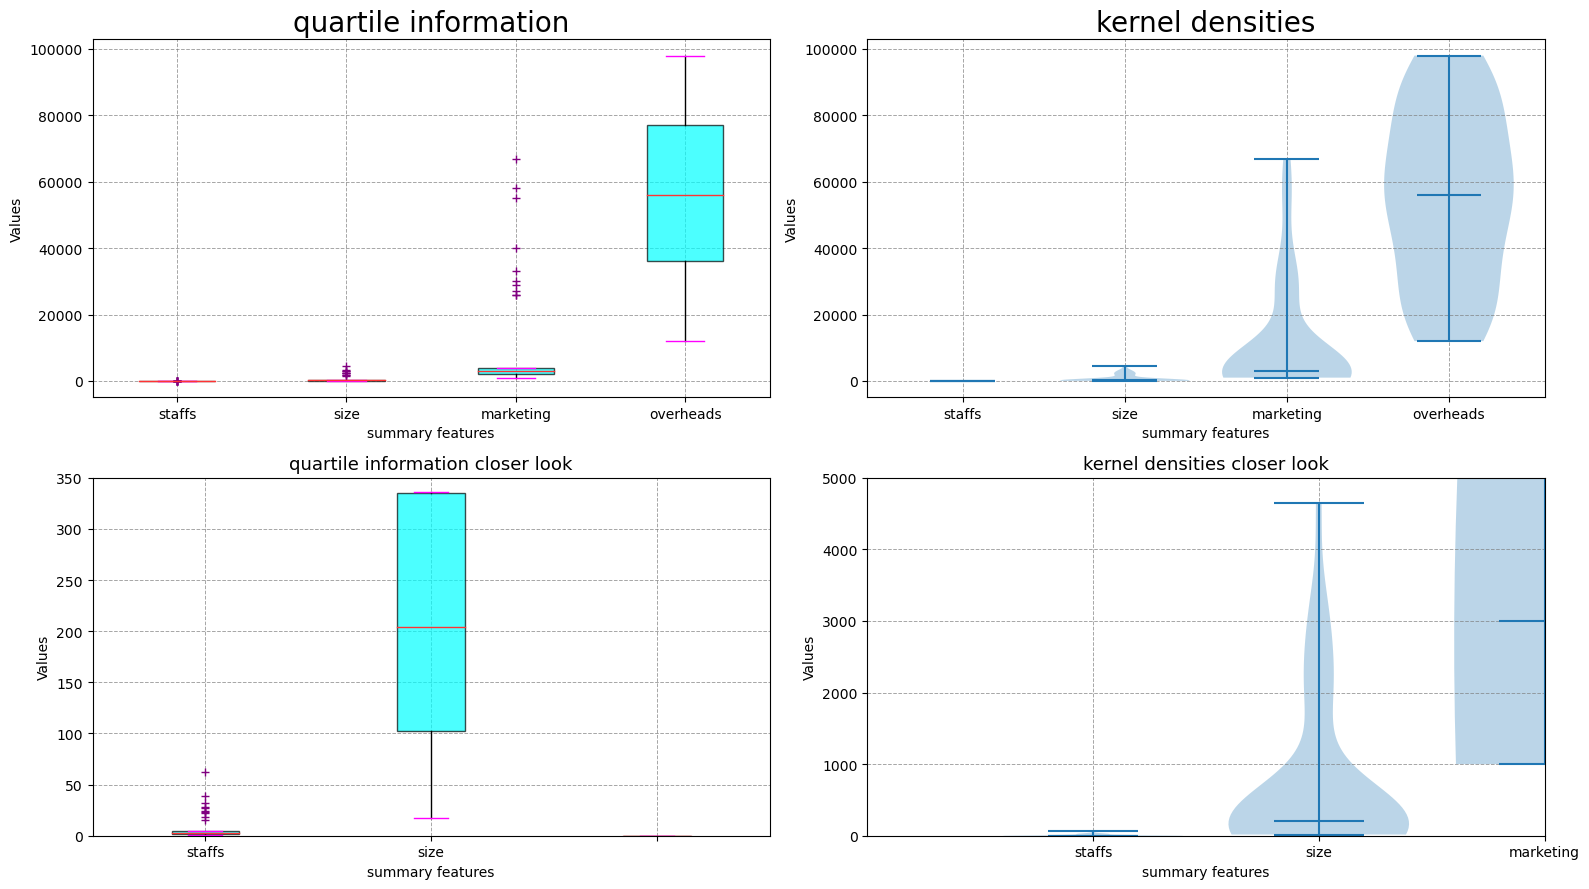

In [17]:
data = [staff[0] , size[0] , marketing[0],  overheads[0]]
plt.figure(figsize = (16,9))
plt.subplot(2,2,1)
plt.boxplot(data , labels = ['staffs' , 'size' , 'marketing' , 'overheads'],
            patch_artist = True,
            boxprops = {'facecolor':'cyan', "alpha" : 0.7},
            medianprops = {'color': '#FF3333'},
            flierprops = {'marker': '+','markerfacecolor':'pink','markeredgecolor':'purple'},
            whiskerprops = {"color":"black"},
            capprops = {"color":"magenta"})
plt.grid(color = 'gray' , linestyle = '--'  , linewidth = 0.7 , alpha = 0.7)
plt.xlabel('summary features' , fontsize = 10)
plt.ylabel('Values',fontsize = 10)
plt.title('quartile information' , fontsize = 20)

plt.subplot(2,2,2)
plt.violinplot(data , showmedians = True,
               widths = 0.8,
               vert = True ,
               positions = [1,2,3,4],
               points = 100,
               bw_method = 0.5)
plt.xlabel('summary features' , fontsize = 10)
plt.ylabel('Values' , fontsize = 10)
plt.xticks([1,2,3,4] , ['staffs' , 'size' , 'marketing' , 'overheads'])
plt.grid(color = 'gray' , linestyle = '--'  , linewidth = 0.7 , alpha = 0.7)
plt.title('kernel densities' , fontsize = 20)

empty_set = np.linspace(0,0.001,len(staff[0]))
small_data = [staff[0] , size[0] ,empty_set]
plt.subplot(2,2,3)
plt.boxplot(small_data , labels = ['staffs' , 'size' , '' ],
            patch_artist = True,
            boxprops = {'facecolor':'cyan', "alpha" : 0.7},
            medianprops = {'color': '#FF3333'},
            flierprops = {'marker': '+','markerfacecolor':'pink','markeredgecolor':'purple'},
            whiskerprops = {"color":"black"},
            capprops = {"color":"magenta"})
plt.grid(color = 'gray' , linestyle = '--'  , linewidth = 0.7 , alpha = 0.7)
plt.xlabel('summary features' , fontsize = 10)
plt.ylim(0,350)
plt.ylabel('Values',fontsize = 10)
plt.title('quartile information closer look' , fontsize = 13)

plt.subplot(2,2,4)
plt.violinplot(data , showmedians = True,
               widths = 0.8,
               vert = True ,
               positions = [1,2,3,4],
               points = 100,
               bw_method = 0.5)
plt.xlabel('summary features' , fontsize = 10)
plt.ylabel('Values' , fontsize = 10)
plt.xticks([1,2,3,4] , ['staffs' , 'size' , 'marketing','overheads'])
plt.grid(color = 'gray' , linestyle = '--'  , linewidth = 0.7 , alpha = 0.7)
plt.xlim(0,3)
plt.ylim(0,5000)
plt.title('kernel densities closer look' , fontsize = 13)

plt.tight_layout()
plt.show()

# Visualization-7 Heatmaps to understand which sector has spent more money with respect to number of staffs


Data Binning for further Analysis

In [18]:
new_df_1 = pd.DataFrame(Outlet_summary)
print(new_df_1.head(3))
print(Outlet_summary.head())

    Id  Staff  Size (msq)  Marketing (£)  Overheads (£)
0  ZSJ      2          99           1000          87000
1  CYK     18        2297          30000          60000
2  IZX      1          65           2000          24000
    Id  Staff  Size (msq)  Marketing (£)  Overheads (£)
0  ZSJ      2          99           1000          87000
1  CYK     18        2297          30000          60000
2  IZX      1          65           2000          24000
3  NLT      3         266           3000          80000
4  DZZ      3         218           2000          87000


In [19]:
# data binning

def marketing_binner(expense):
    if expense >= 1000 and expense < 10000:
        return "greater than 1000"
    elif expense >= 10000 and expense < 20000:
        return "greater than 10000"
    elif expense >= 20000 and expense < 30000:
        return "greater than 20000"
    elif expense >= 30000 and expense < 40000:
        return "greater than 30000"
    elif expense >= 40000 and expense < 50000:
        return "greater than 40000"
    elif expense >= 50000:
        return "greater than 50000"
    else:
        return "lesser than 1000"

def overheads_binner(expense):
    if expense >= 10000 and expense < 30000:
        return "greater than 10000"
    elif expense >= 30000 and expense < 50000:
        return "greater than 30000"
    elif expense >= 50000 and expense < 70000:
        return "greater than 50000"
    elif expense >= 70000 and expense < 90000:
        return "greater than 70000"
    elif expense >= 90000:
        return "greater than 90000"
    else:
        return "lesser than 10000"

def staff_binner(staff_count):
    if staff_count >= 1 and staff_count < 20:
        return "more than 1"
    elif staff_count >= 20 and staff_count < 30:
        return "greater than 20"
    else:
        return "greater than 30"

def size_binner(size):
    if size >= 1 and size < 100:
        return "small"
    elif size >= 100 and size < 2000:
        return "medium"
    elif size >= 2000:
        return "large"

In [20]:
new_df_1["Marketing (£)"] = new_df_1["Marketing (£)"].apply(marketing_binner)
new_df_1["Staff"] = pd.to_numeric(new_df_1["Staff"], errors="coerce")
new_df_1["Staff"] = new_df_1["Staff"].apply(staff_binner)
new_df_1["Size (msq)"] = new_df_1["Size (msq)"].apply(size_binner)
pivoted_df_1 = new_df_1.pivot_table(index ="Marketing (£)" ,columns = "Size (msq)" ,values = "Overheads (£)").fillna(0)

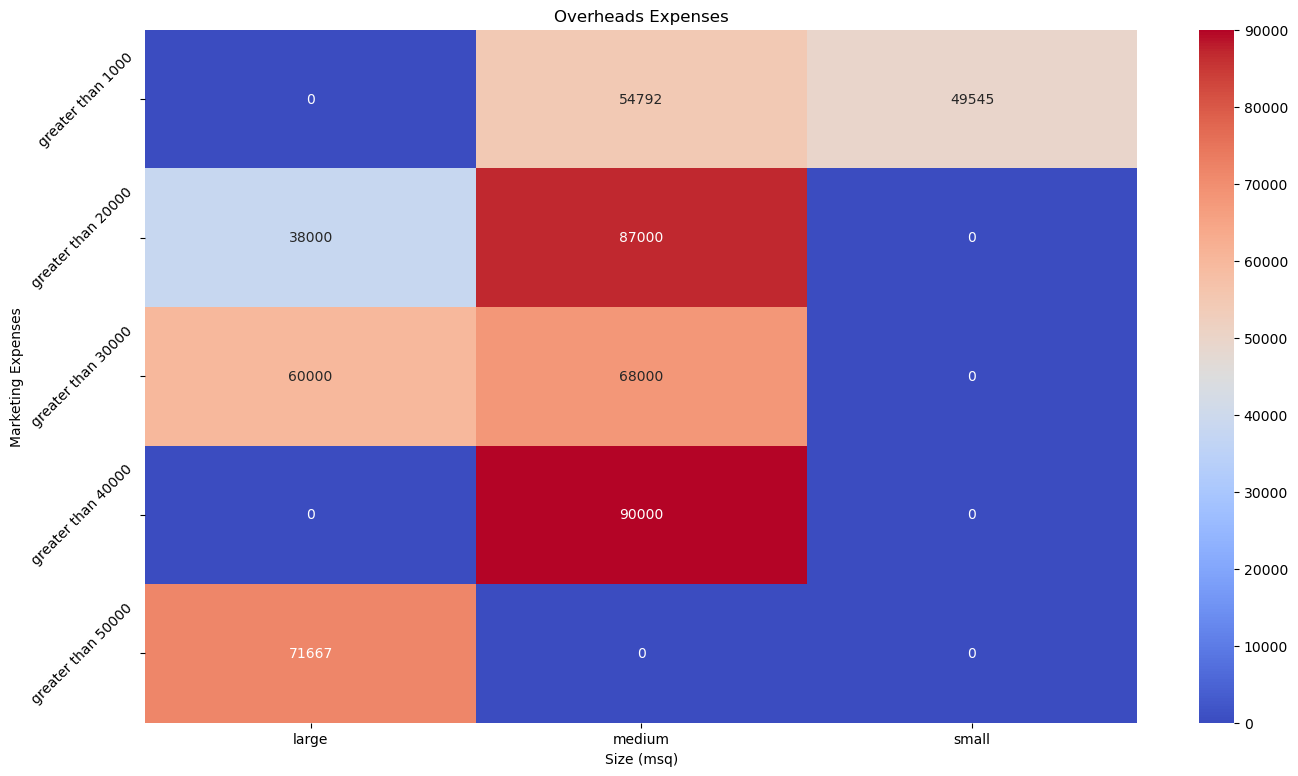

In [21]:
plt.figure(figsize = (16,9))
sns.heatmap(pivoted_df_1 , fmt = '.0f' , annot = True , cmap = 'coolwarm')
plt.title("Overheads Expenses")
plt.ylabel("Marketing Expenses")
plt.yticks(rotation = 45)
plt.show()

In [24]:
new_df_2 = pd.DataFrame(Outlet_summary).copy()
print(new_df_2.head())

    Id  Staff  Size (msq)  Marketing (£)  Overheads (£)
0  ZSJ      2          99           1000          87000
1  CYK     18        2297          30000          60000
2  IZX      1          65           2000          24000
3  NLT      3         266           3000          80000
4  DZZ      3         218           2000          87000


In [25]:
new_df_2["Overheads (£)"] = new_df_2["Overheads (£)"].apply(overheads_binner)
new_df_2["Staff"] = pd.to_numeric(new_df_2["Staff"], errors="coerce")
new_df_2["Staff"] = new_df_2["Staff"].apply(staff_binner)
new_df_2["Size (msq)"] = new_df_2["Size (msq)"].apply(size_binner)
pivoted_df_2 = new_df_2.pivot_table(index ="Overheads (£)" ,columns = "Size (msq)"  ,values = "Marketing (£)").fillna(0)
print(pivoted_df_2)

Size (msq)            large        medium   small
Overheads (£)                                    
greater than 10000  26500.0   3250.000000  1500.0
greater than 30000  55000.0   3250.000000  2500.0
greater than 50000  30000.0   5545.454545  2500.0
greater than 70000  42000.0   8400.000000  1000.0
greater than 90000  67000.0  15333.333333  1500.0


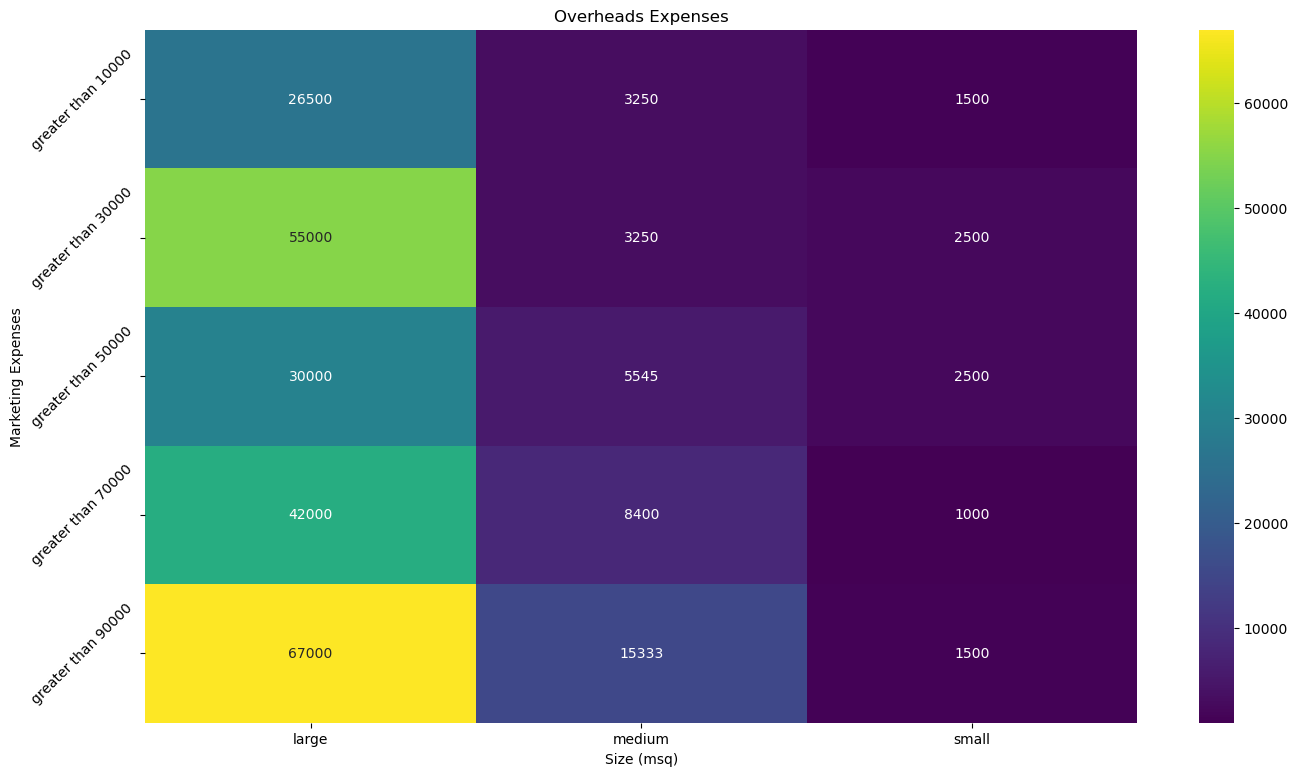

In [26]:
plt.figure(figsize = (16,9))
sns.heatmap(pivoted_df_2, fmt = '.0f' , annot = True , cmap = 'viridis')
plt.title("Overheads Expenses")
plt.ylabel("Marketing Expenses")
plt.yticks(rotation = 45)
plt.show()

# Visualization-9 Bar plot for correlation analysis

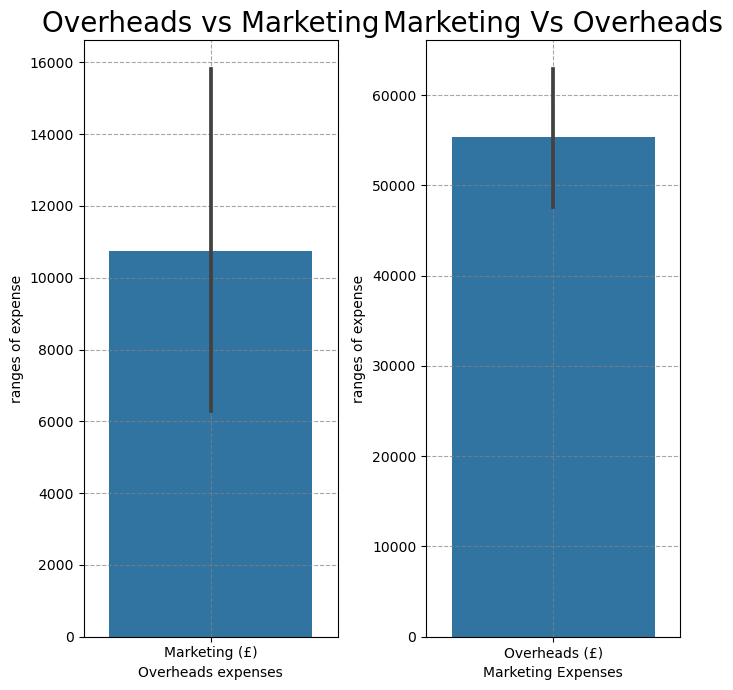

In [27]:
fig , axes = plt.subplots(nrows = 1 , ncols = 2 , figsize = (7,7))

sns.barplot(new_df_2 , ax = axes[0])
axes[0].set_xlabel('Overheads expenses',fontsize = 10)
axes[0].set_ylabel('ranges of expense',fontsize = 10)
axes[0].set_title("Overheads vs Marketing" , fontsize = 20)
axes[0].grid(color= "gray" , linestyle ="--" , alpha = 0.7)

sns.barplot(new_df_1 , ax = axes[1])
axes[1].set_xlabel('Marketing Expenses',fontsize = 10)
axes[1].set_ylabel('ranges of expense',fontsize = 10)
axes[1].set_title("Marketing Vs Overheads" , fontsize = 20)
axes[1].grid(color= "gray" , linestyle ="--" , alpha = 0.7)

plt.tight_layout()
plt.show()

INTERACTIVE VISUALIZATIONS WITH PLOTLY

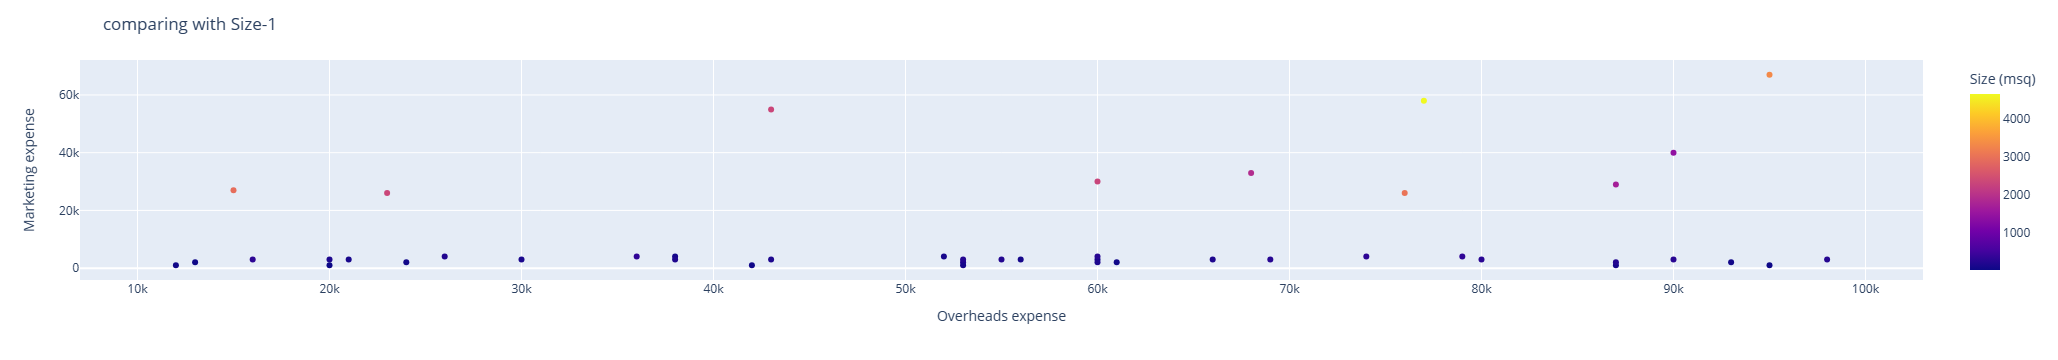

In [28]:
import plotly.express as px

fig = px.scatter(Outlet_summary, x='Overheads (£)', y='Marketing (£)', color='Size (msq)')
fig.update_layout(title='comparing with Size-1', xaxis_title='Overheads expense', yaxis_title='Marketing expense')
fig.show()

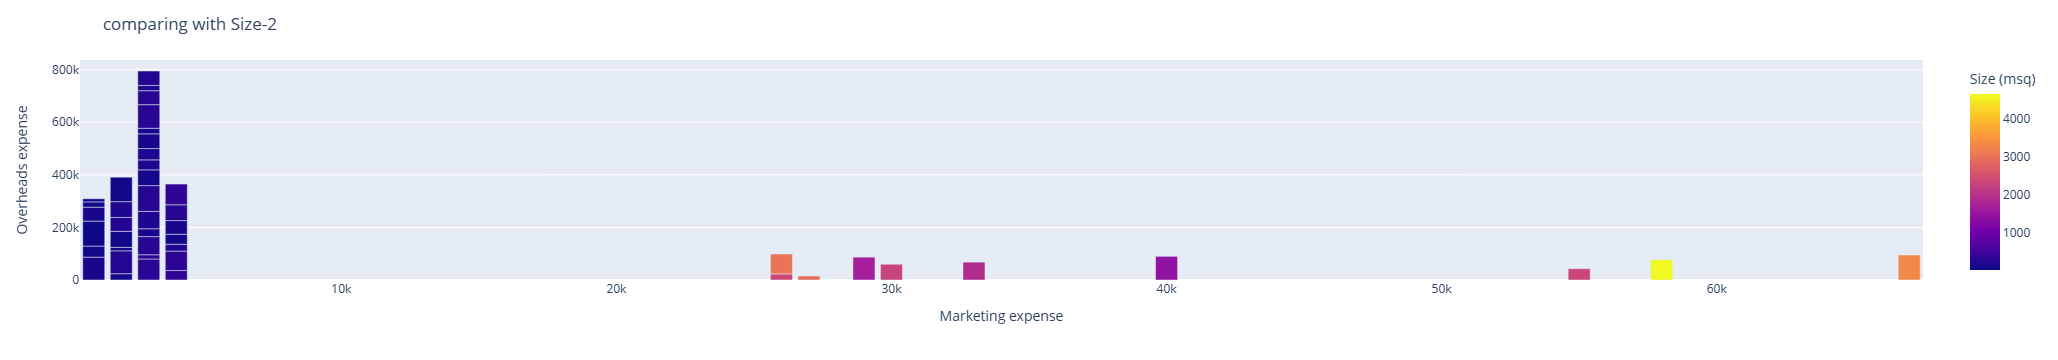

In [29]:
fig = px.bar(Outlet_summary, x='Marketing (£)', y='Overheads (£)', color='Size (msq)')
fig.update_layout(title='comparing with Size-2', xaxis_title='Marketing expense', yaxis_title='Overheads expense')
fig.show()

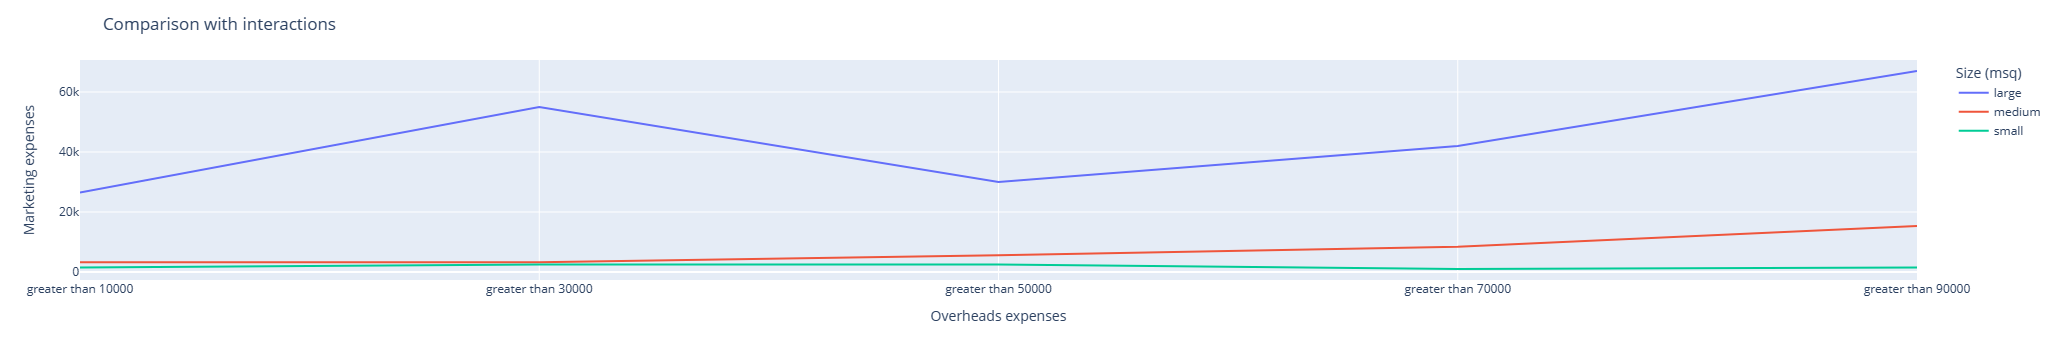

In [30]:
fig = px.line(pivoted_df_2)
fig.update_layout(title='Comparison with interactions', xaxis_title='Overheads expenses', yaxis_title='Marketing expenses')
fig.show()

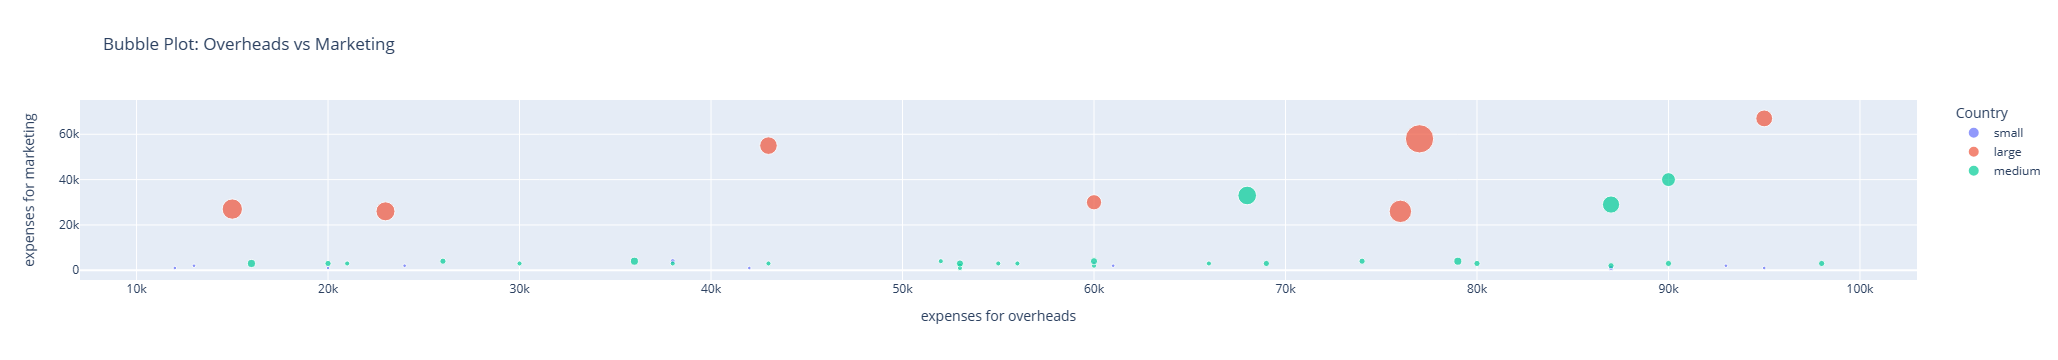

In [31]:
df = pd.DataFrame(Outlet_summary) # creating new dataframe
df["Size (msq)"] = df["Size (msq)"].apply(size_binner) # binning the size feature
# Bubble Plot
fig = px.scatter(df, x='Overheads (£)', y='Marketing (£)', size='Staff', color='Size (msq)',
                 hover_data=['Size (msq)', 'Staff', 'Marketing (£)', 'Overheads (£)'],
                 labels={'Overheads (£)': 'expenses for overheads', 'Marketing (£)': 'expenses for marketing'},
                 title='Bubble Plot: Overheads vs Marketing')

# Customize the layout
fig.update_layout(showlegend=True, legend_title_text='Country')
fig.update_traces(marker=dict(line=dict(width=1, color='white')))

# Display the plot
fig.show()